# Test for Creating a Network over an Area

In [2]:
from shapely.geometry import Point, LineString, Polygon

import matplotlib.pyplot as plt

import geopandas as gpd


C:\Users\raffy\anaconda3\envs\ATN_Devon\lib\site-packages\geopandas\_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Creating the square

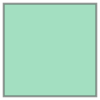

In [3]:
polygon = Polygon([(1,1),(6,1),(6,6),(1,6)])
polygon

Creating the points

In [4]:
points = []
count = [1,2,3,4,5,6]
for i in count:
    points.append(Point(i,1))
    points.append(Point(i,6))
    points.append(Point(1,i))
    points.append(Point(6,i))
points

Checking in the right positions

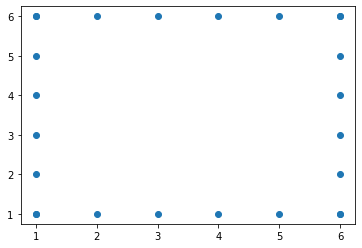

In [5]:
xs = [point.x for point in points]
ys = [point.y for point in points]
plt.scatter(xs, ys)

<function matplotlib.pyplot.show(close=None, block=None)>

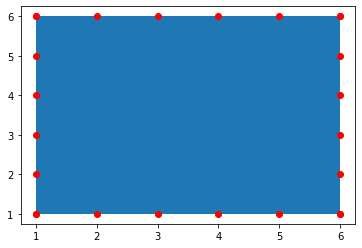

In [6]:
x,y = polygon.exterior.xy
plt.fill(x,y)
plt.plot(xs, ys,'ro')
plt.show

Creating the LineStrings

<AxesSubplot:>

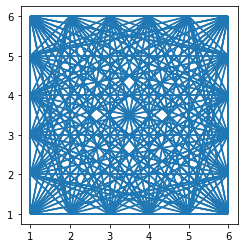

In [11]:
links = []
for i in range(len(points)):
    first_point = points[i]
    for point in points[1:]:
        links.append(LineString([first_point,point]))
    first_point = point
links_gpd = gpd.GeoSeries(links)
links_gpd.plot()

Creating nodes at intersections

<AxesSubplot:>

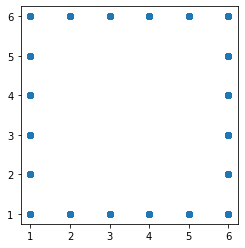

In [16]:
intersecting_points = []
for i in range(len(links)):
    first_link = links[i]
    for link in points[1:]:
        intersecting_points.append(first_link.intersection(link))
    first_link = link
intersecting_points_gpd = gpd.GeoSeries(intersecting_points)
intersecting_points_gpd.plot()